
## 提高识别精度的技术和线索
- 集成学习、学习率衰减、Data Augmentation（数据扩充）等都有助于提高识别精度，尤其是Data Augmentation，虽然方法很简单，但在提高识别精度上效果显著。
- Data Augmentation基于算法“人为地”扩充输入图像（训练图像）。对于输入图像，通过施加旋转、垂直或水平方向上的移动等微小变化，增加图像的数量。这在数据集的图像数量有限时尤其有效。Data Augmentation还可以通过其他各种方法扩充图像，比如裁剪图像的“crop处理”、将图像左右翻转的“flip处理”等（只在不需要考虑图像对称性的情况下有效）。对于一般的图像，施加亮度等外观上的变化、放大缩小等尺度上的变化也是有效的。不管怎样，通过Data Augmentation巧妙地增加训练图像，就可以提高深度学习的识别精度。虽然这个看上去只是一个简单的技巧，不过经常会有很好的效果。

## 加深层数的好处
- 可以减少网络的参数数量；一次5 × 5的卷积运算的区域可以由两次3 × 3的卷积运算抵充。并且，相对于前者的参数数量25（5 × 5），后者一共是18（2 × 3 × 3），通过叠加卷积层，参数数量减少了。
    - 叠加小型滤波器来加深网络的好处是可以减少参数的数量，扩大感受野（receptive field，给神经元施加变化的某个局部空间区域）。并且，通过叠加层，将 ReLU等激活函数夹在卷积层的中间，进一步提高了网络的表现力。这是因为向网络添加了基于激活函数的“非线性”表现力，通过非线性函数的叠加，可以表现更加复杂的东西
- 使学习更加高效；与没有加深层的网络相比，通过加深层，可以减少学习数据

# VGG

- VGG是由卷积层和池化层构成的基础的CNN,它的特点在于将有权重的层（卷积层或者全连接层）叠加至16层（或者19层），具备了深度（根据层的深度，有时也称为“VGG16”或“VGG19”）
- VGG中需要注意的地方是，基于3×3的小型滤波器的卷积层的运算是连续进行的。如下图所示，重复进行“卷积层重叠2次到4次，再通过池化层将大小减半”的处理，最后经由全连接层输出结果。
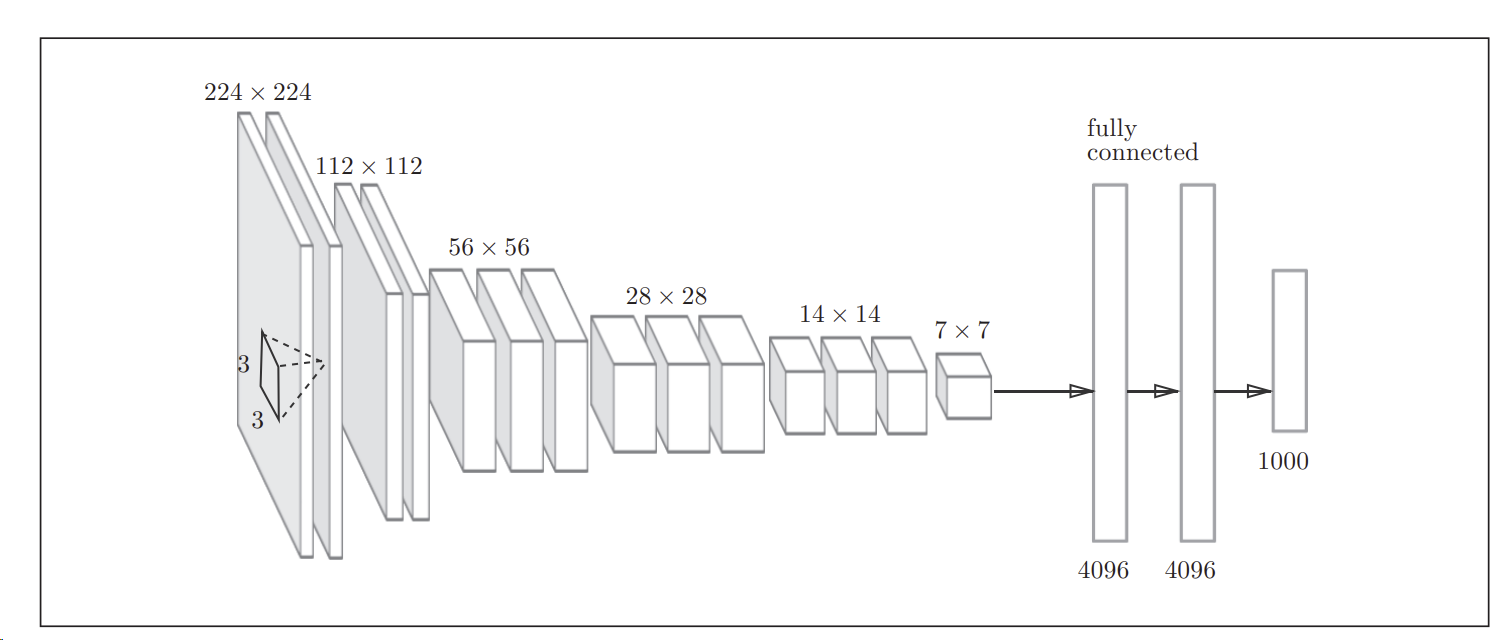


# GoogLeNet

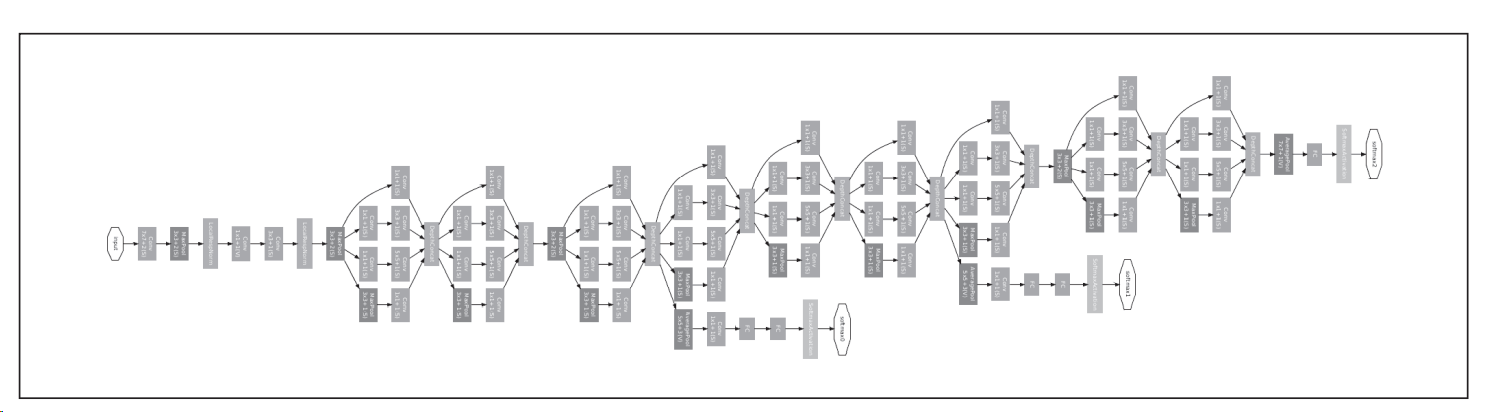
- 只看图的话，这似乎是一个看上去非常复杂的网络结构，但实际上它基本上和之前介绍的CNN结构相同。
- 不过，GoogLeNet的特征是，网络不仅在纵向上有深度，在横向上也有深度（广度）
    - GoogLeNet在横向上有“宽度”，这称为“Inception结构”，如下图所示
    - Inception结构使用了多个大小不同的滤波器（和池化），最后再合并它们的结果。GoogLeNet的特征就是将这个Inception结构用作一个构件（构成元素）。此外，在GoogLeNet中，很多地方都使用了大小为 × 1的滤波器的卷积层。这个1 × 1的卷积运算通过在通道方向上减小大小，有助于减少参数和实现高速化处理
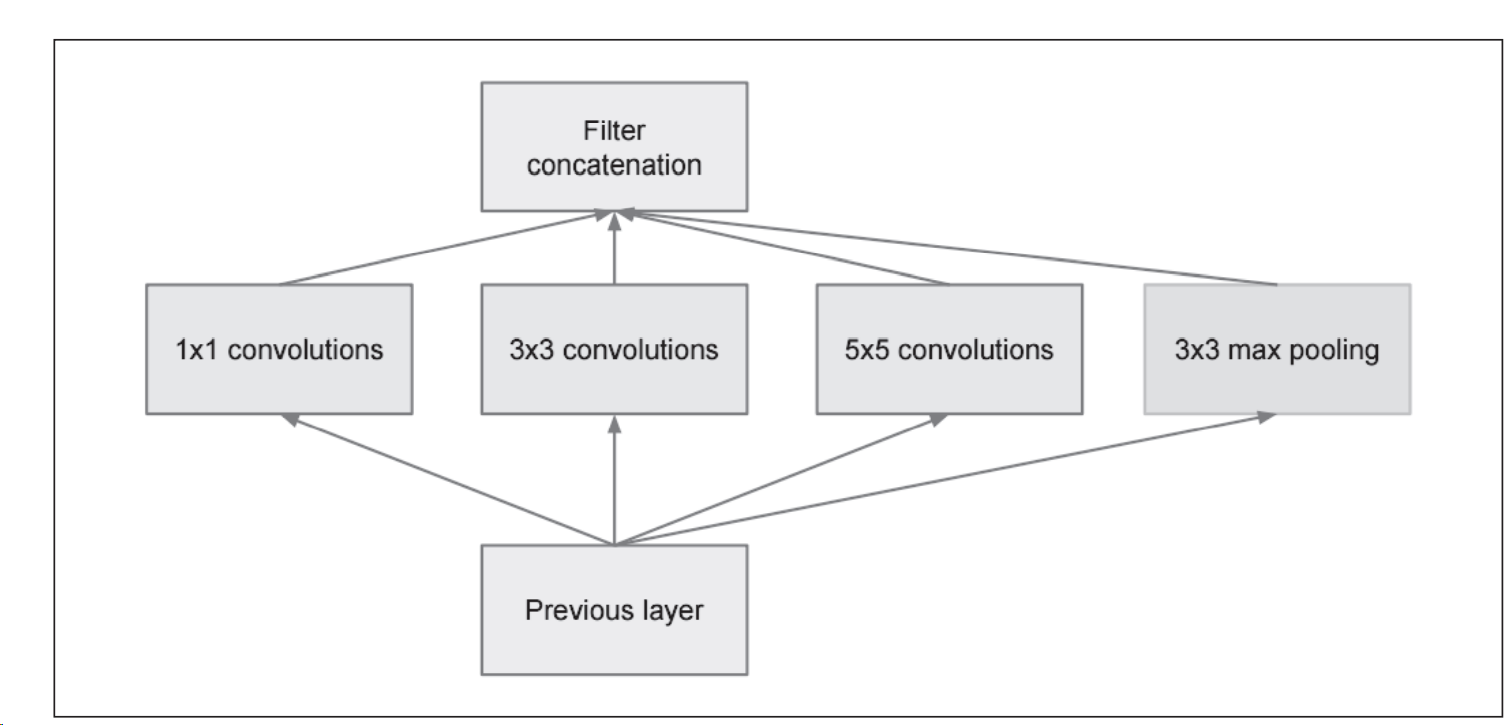 

# RestNet
- 我们知道道加深层对于提升性能很重要。但是，在深度学习中，过度加深层的话，很多情况下学习将不能顺利进行，导致最终性能不佳。ResNet中，为了解决这类问题，导入了“快捷结构”（也称为“捷径”或“小路”）。导入这个快捷结构后，就可以随着层的加深而不断提高性能了（当然，层的加深也是有限度的）。
- 快捷结构横跨（跳过）了输入数据的卷积层，将输入x合计到输出，在连续2层的卷积层中，将输入x跳着连接至2层后的输出。
- 这里的重点是，通过快捷结构，原来的2层卷积层的输出F(x)变成了F(x) + x。通过引入这种快捷结构，即使加深层，也能高效地学习。这是因为，通过快捷结构，反向传播时信号可以无衰减地传递
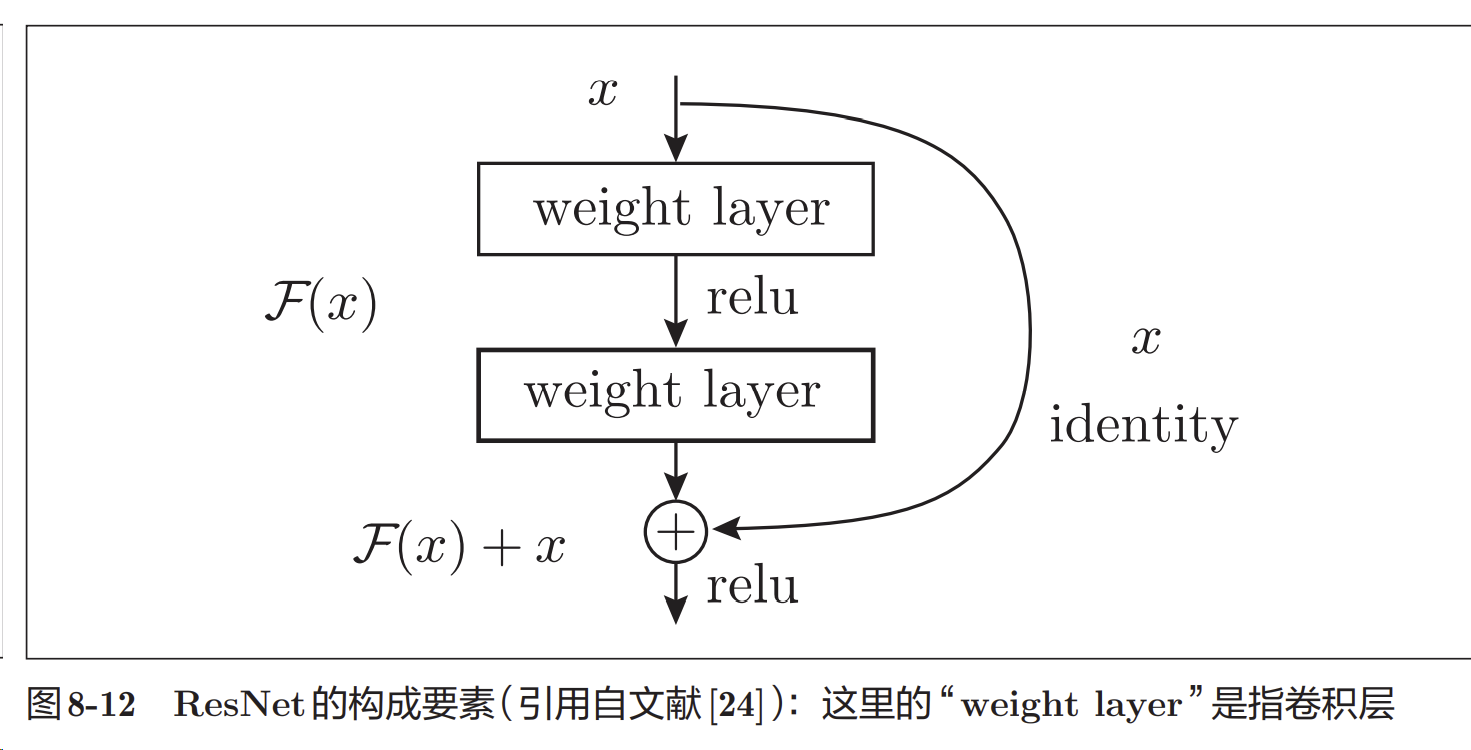

- 因为快捷结构只是原封不动地传递输入数据，所以反向传播时会将来自上游的梯度原封不动地传向下游。这里的重点是不对来自上游的梯度进行任何处理，将其原封不动地传向下游。因此，基于快捷结构，不用担心梯度会变小（或变大），能够向前一层传递“有意义的梯度”。通过这个快捷结构，之前因为加深层而导致的梯度变小的梯度消失问题就有望得到缓解。
- ResNet以前面介绍过的VGG网络为基础，引入快捷结构以加深层
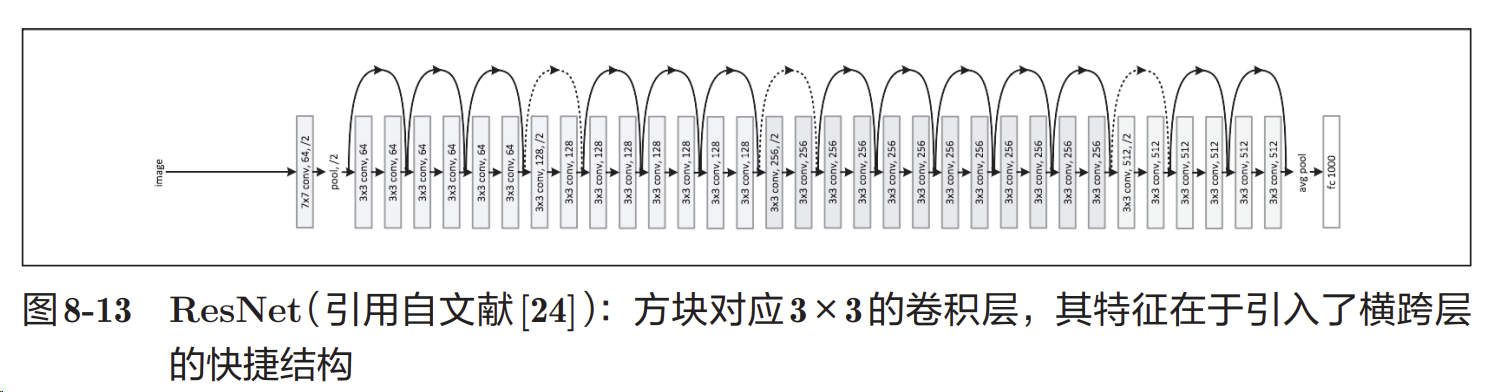

## 迁移学习
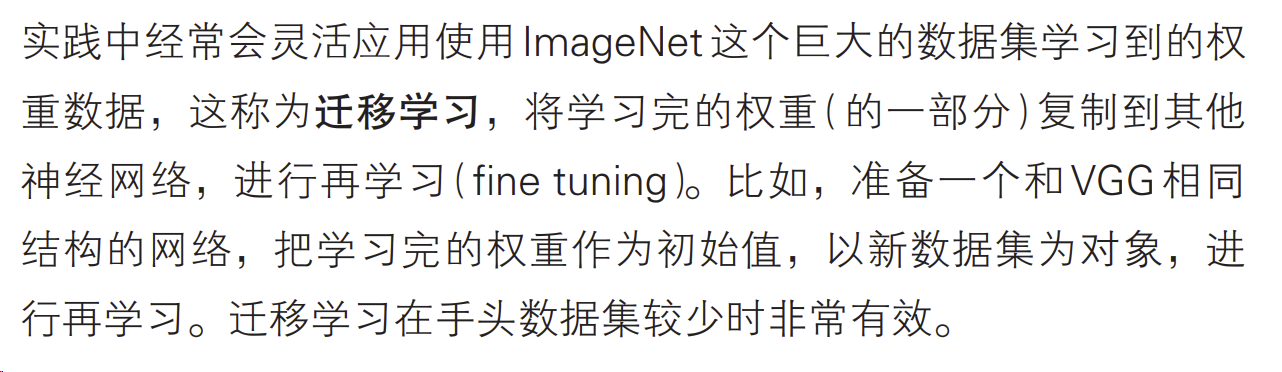

# 深度学习应用案例
## 物体检测
- R-CNN
- Faster R-CNN
## 图像分割
- FCN（Fully Convolutional Network）
    - FCN的字面意思是“全部由卷积层构成的网络”。相对于一般的CNN包含全连接层，FCN将全连接层替换成发挥相同作用的卷积层。在物体识别中使用的网络的全连接层中，中间数据的空间容量被作为排成一列的节点进行处理，而只由卷积层构成的网络中，空间容量可以保持原样直到最后的输出。
    - FCN的特征在于最后导入了扩大空间大小的处理。基于这个处理，变小了的中间数据可以一下子扩大到和输入图像一样的大小。FCN最后进行的扩大处理是基于双线性插值法的扩大（双线性插值扩大）。FCN中，这个双线性插值扩大是通过去卷积（逆卷积运算）来实现的
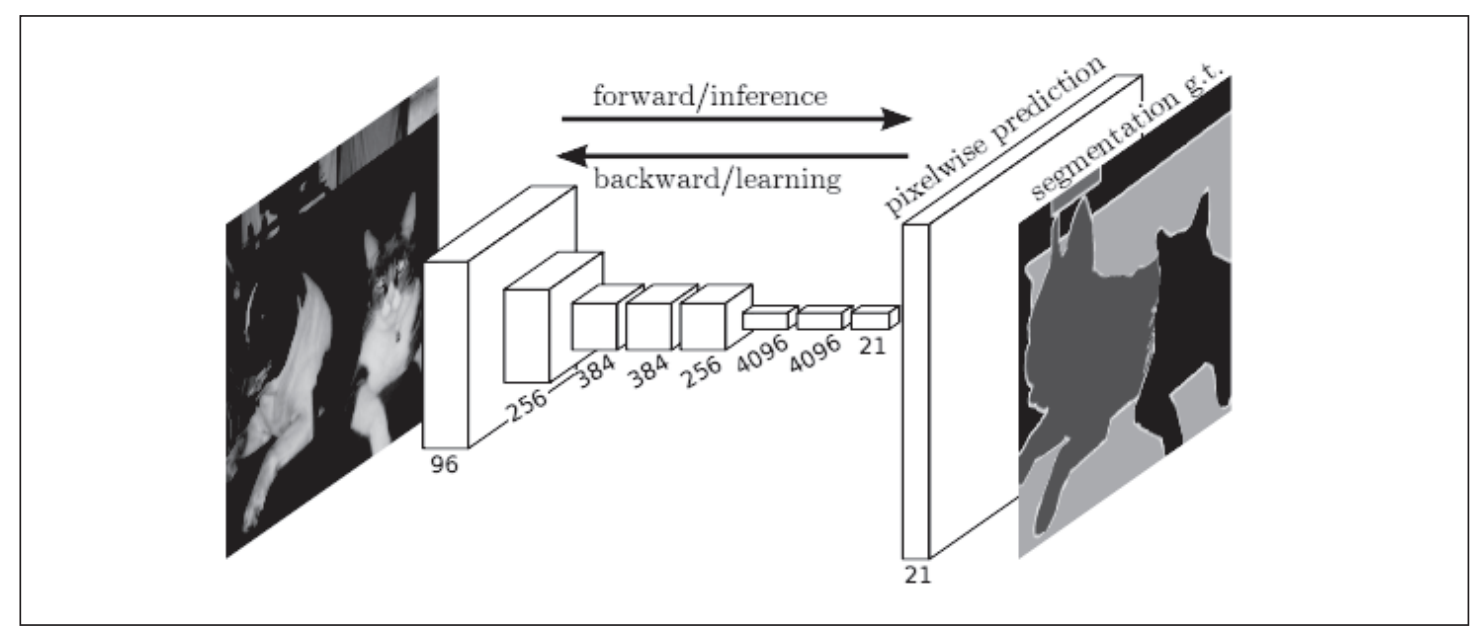

- 全连接层中，输出和全部的输入相连。使用卷积层也可以实现与此结构完全相同的连接。比如，针对输入大小是 32×10×10（通道数 32、高 10、长 10）的数据的全连接层可以替换成滤波器大小为32×10×10的卷积层。如果全连接层的输出节点数是 100，那么在卷积层准备 100个 32×10×10的滤波器就可以实现完全相同的处理。像这样，全连接层可以替换成进行相同处理的卷积层。

## 图像标题生成
- NIC（Neural Image Caption），NIC由深层的CNN和处理自然语言的RNN（Recurrent Neural Network）构成。RNN是呈递归式连接的网络，经常被用于自然语言、时间序列数据等连续性的数据上
- NIC基于CNN从图像中提取特征，并将这个特征传给RNN。RNN以CNN提取出的特征为初始值，递归地生成文本。这里，我们不深入讨论技术上的细节，不过基本上NIC是组合了两个神经网络（CNN和RNN）的简单结构。基于NIC，可以生成惊人的高精度的图像标题。我们将组合图像和自然语言等多种信息进行的处理称为多模态处理。
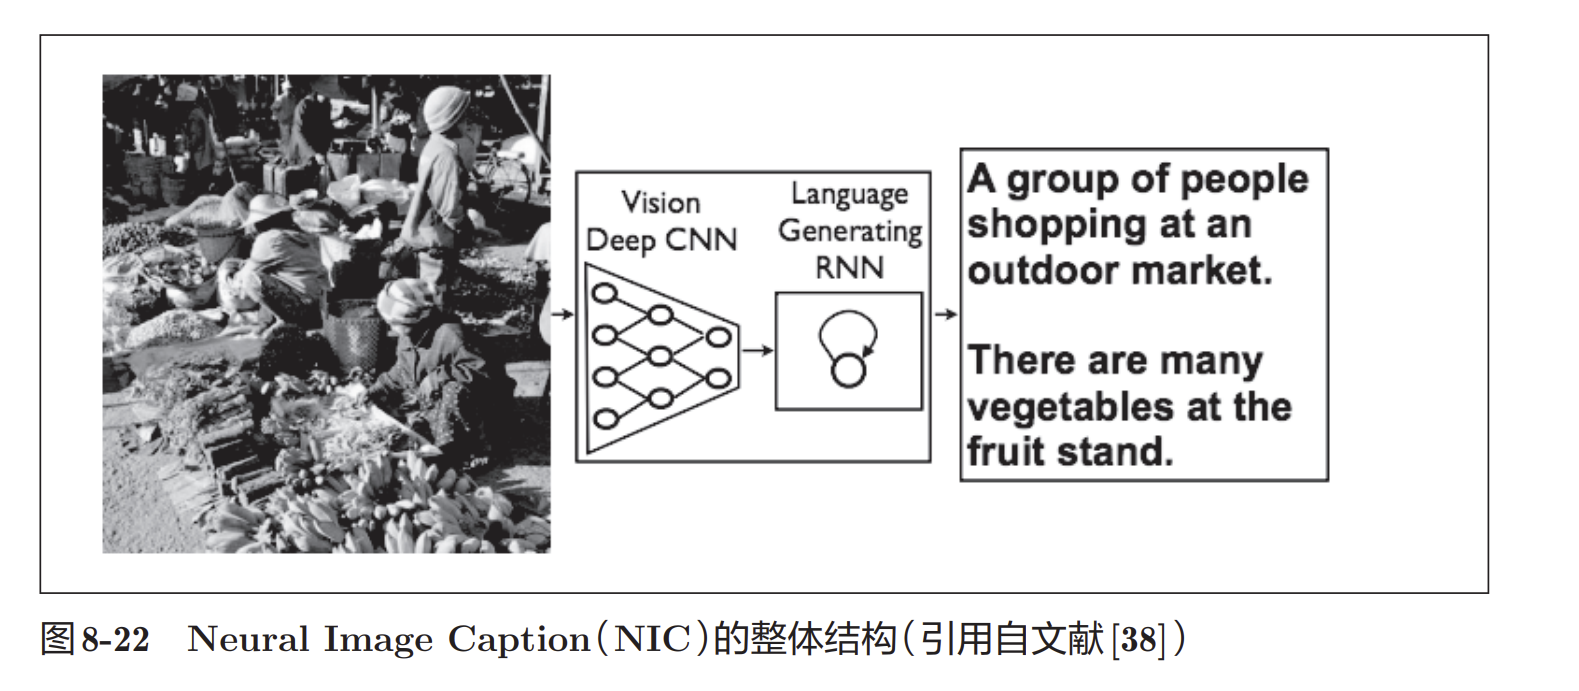

- RNN的R表示Recurrent（递归的）。这个递归指的是神经网络的递归的网络结构。根据这个递归结构，神经网络会受到之前生成的信息的影响（换句话说，会记忆过去的信息），这是 RNN的特征。比如，生成“我”这个词之后，下一个要生成的词受到“我”这个词的影响，生成了“要”；然后，再受到前面生成的“我要”的影响，生成了“睡觉”这个词。对于自然语言、时间序列数据等连续性的数据，RNN以记忆过去的信息的方式运行。


## 图像风格变换
- A Neural Algorithm of Artistic Style

## 图像生成
- DCGAN(Deep Convolutional Generative Adversarial Network)
- 其技术要点是使用了Generator（生成者）和Discriminator（识别者）这两个神经网络。Generator生成近似真品的图像，Discriminator判别它是不是真图像（是Generator生成的图像还是实际拍摄的图像）。像这样，通过让两者以竞争的方式学习，Generator会学习到更加精妙的图像作假技术，Discriminator则会成长为能以更高精度辨别真假的鉴定师。两者互相切磋、共同成长，这是GAN（Generative Adversarial Network）这个技术的有趣之处。在这样的切磋中成长起来的Generator最终会掌握画出足以以假乱真的图像的能力（或者说有这样的可能）

## 自动驾驶
- 基于CNN的神经网络SegNet，高精度地识别行驶环境
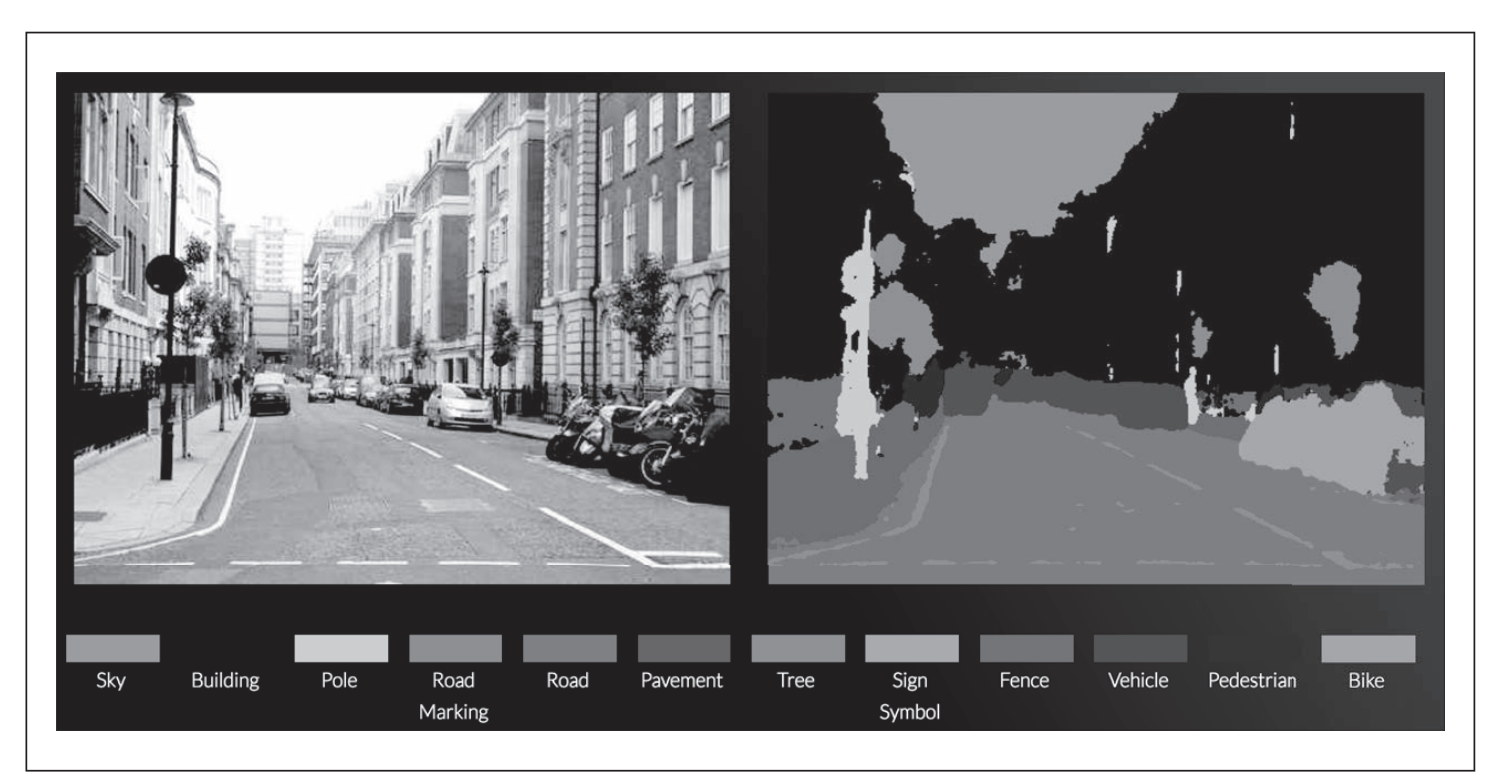


## 强化学习
- 就像人类通过摸索试验来学习一样（比如骑自行车），让计算机也在摸索试验的过程中自主学习，这称为强化学习。
- 强化学习的基本框架是，代理（Agent）根据环境选择行动，然后通过这个行动改变环境。根据环境的变化，代理获得某种报酬。强化学习的目的是决定代理的行动方针，以获得更好的报酬。
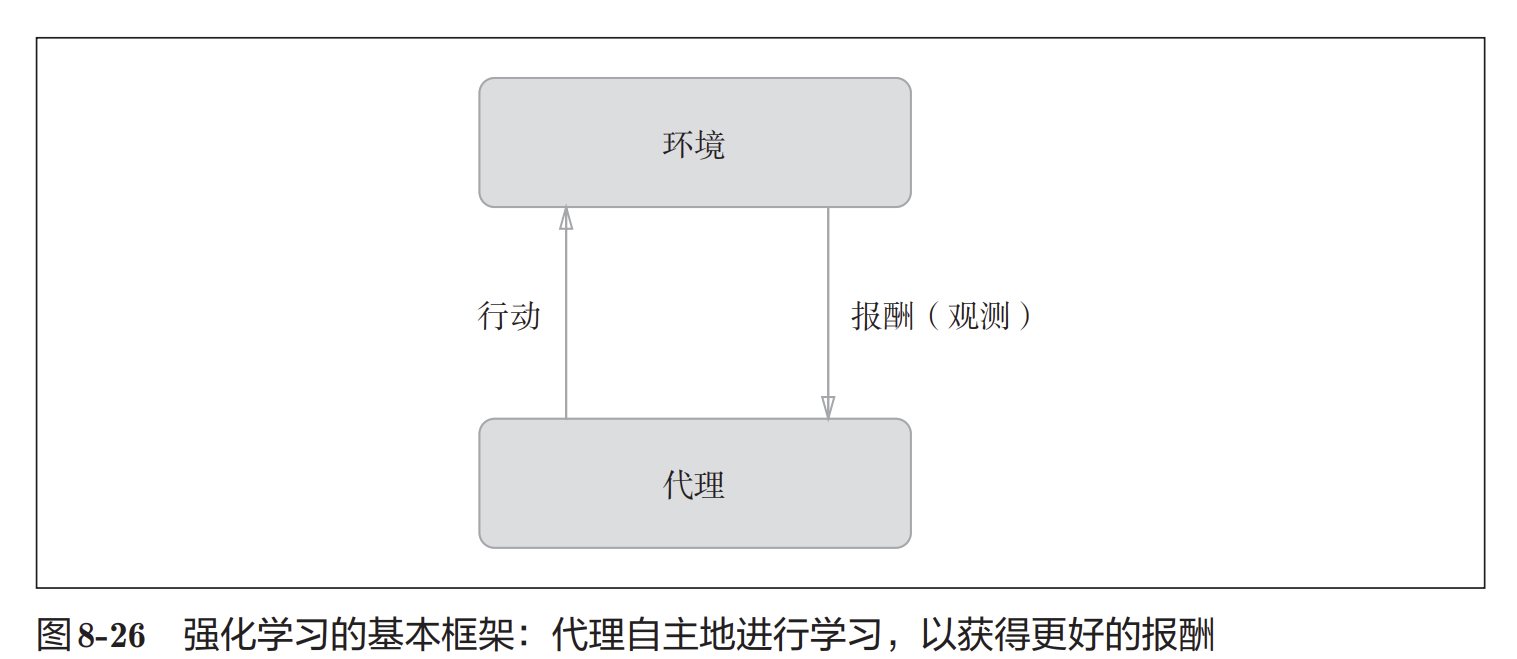

- 有一个叫作Deep Q-Network（通称DQN）的方法。该方法基于被称为Q学习的强化学习算法。

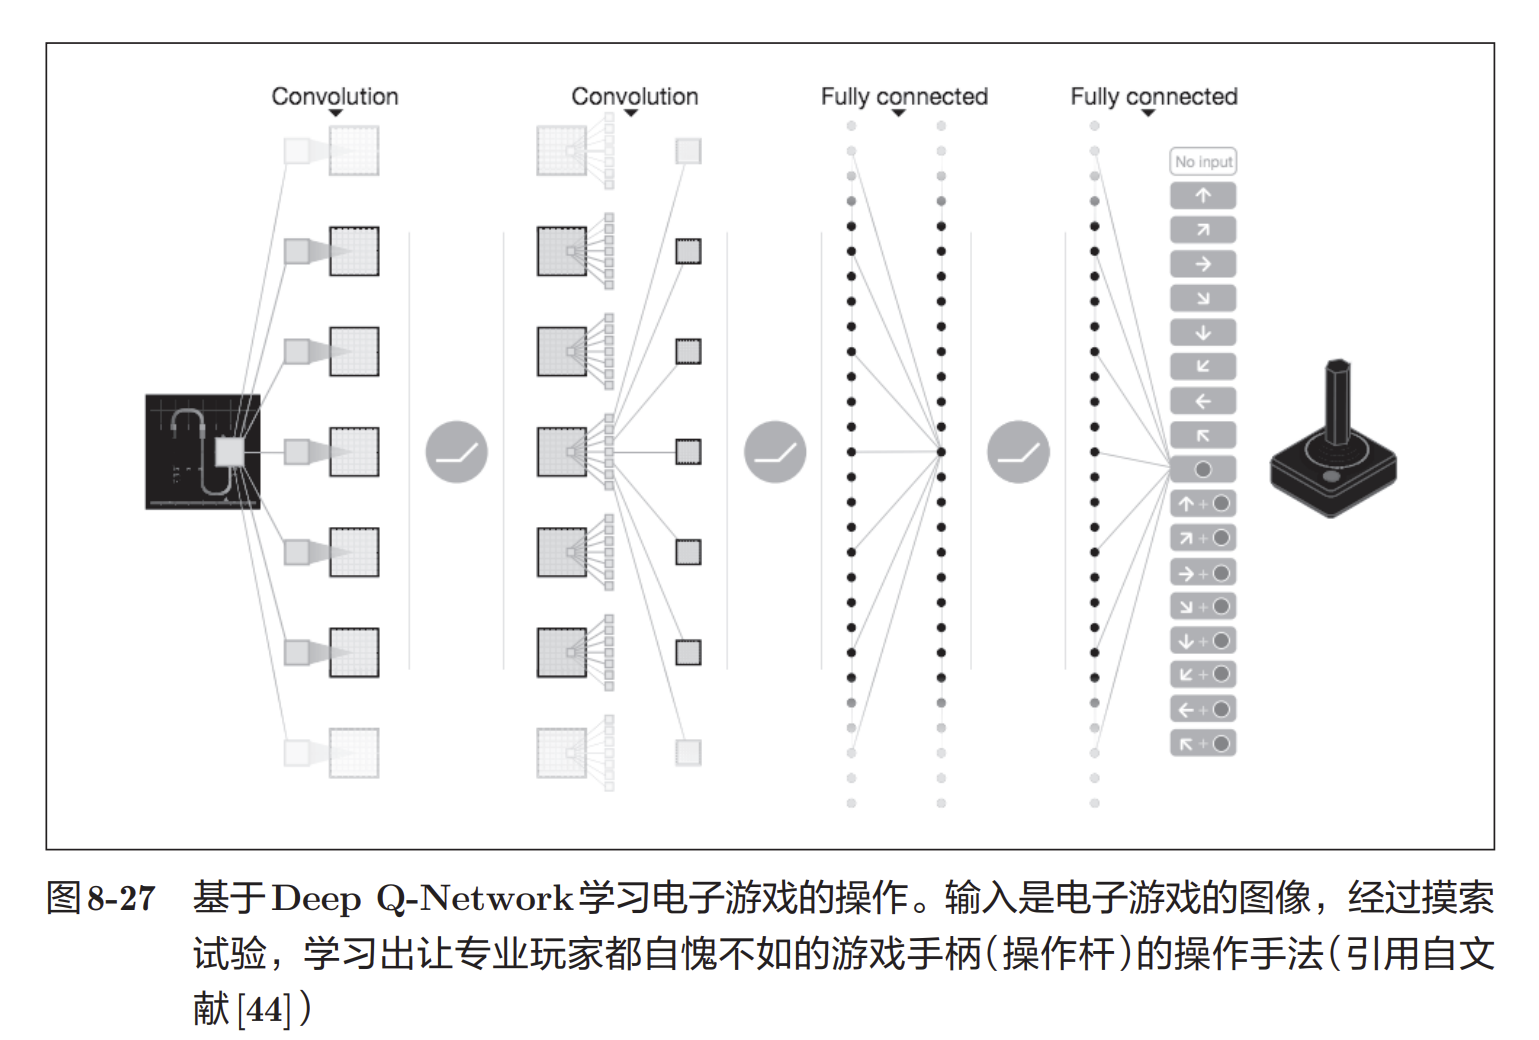